# IA Paper 4 - Mathematics - Examples paper 3

## Question 3: Complex variables

Find all roots of  
(a) $z^4 +1 =0$  
(b) $z^8 - z^4 + 1 = 0$  

and plot them on an Argand diagram.

#### Python hints

- You may find the NumPy `roots` function useful.
- The roots can be plotted, and then a circle added after.

### Solution 

#### Trivial solution

Given that we have calculated the roots for (a) to be $z=e^{i \pi/4 + in \pi/2} $ and the roots for (b) to be $z=e^{(\pm i \pi/12) + in \pi/2} $ for integer n, since $z=re^{i \theta}$ we could plot these using the argument of $i$ in the exponent as the angle and unit magnitude.

However, this is not the easiest way to do it and this doesn't give the most helpful plot for imaginary numbers and above we still had to calculate and input the roots by hand.

#### Simpler (and better) solution

We import the relevant modules for plotting and NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

NumPy has a `roots` function (http://docs.scipy.org/doc/numpy/reference/generated/numpy.roots.html) which expects an array as an argument and computes the roots. The array holds the coefficients for the polynomial, starting from the highest order coefficient in the zeroth place. For example, `np.array([1, 0, 0, 0, 1])` is the array holding the coefficients of $z^4 + 1 =0$.

We start by finding the roots of equations (a) and (b):

In [2]:
# Compute roots
aroot = np.roots(np.array([1, 0, 0, 0, 1]))
print("Roots of (a): {}".format(aroot))

broot = np.roots(np.array([1, 0, 0, 0, -1, 0, 0, 0, 1]))
print("Roots of (b): {}".format(broot))

Roots of (a): [-0.70710678+0.70710678j -0.70710678-0.70710678j  0.70710678+0.70710678j
  0.70710678-0.70710678j]
Roots of (b): [-0.96592583+0.25881905j -0.96592583-0.25881905j -0.25881905+0.96592583j
 -0.25881905-0.96592583j  0.25881905+0.96592583j  0.25881905-0.96592583j
  0.96592583+0.25881905j  0.96592583-0.25881905j]


We then create an array to hold values of $\theta$ to plot circles through the points on the Argand Diagram so we can plot them as we are used to seeing them.

In [3]:
# Creates evenly spaced values between 0 and 2π to plot a circle
θ = np.linspace(0, 2*np.pi, 100)

We then plot the roots, add the circles and tidy the plots up. 

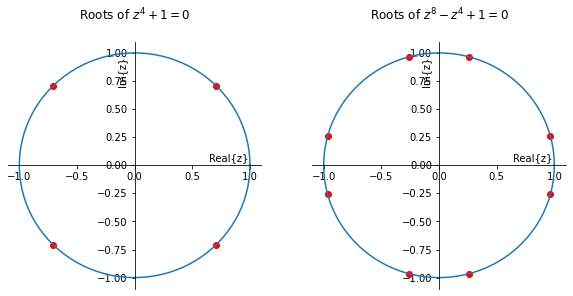

In [4]:
# Creates figure
fig = plt.figure(figsize=(10, 10))

# Subplots for (a) and (b)
axA = fig.add_subplot(2, 2, 1)
axB = fig.add_subplot(2, 2, 2)

# Titles both plots
axA.set_title("Roots of $z^4 +1 = 0$\n")
axB.set_title("Roots of $z^8 - z^4 + 1 = 0$\n")

# Plot roots (real on x, imag on y axes) of (a) and (b)
axA.plot(aroot.real, aroot.imag, 'ro')
axB.plot(broot.real, broot.imag, 'ro')

# Set centre, labels, etc.
plots = [axA, axB]
for plot in plots:

    # Plots a circle through the roots on each of the above plots.
    plot.plot(np.cos(θ), np.sin(θ))

    # Moves the axes to centre for both plots
    plot.spines['left'].set_position('center')
    plot.spines['bottom'].set_position('center')
    plot.spines['right'].set_color('none')
    plot.spines['top'].set_color('none')

    # Labels axes
    plot.set_xlabel("Real{z}")
    plot.xaxis.set_label_coords(0.87, 0.55)
    plot.set_ylabel("Im{z}")
    plot.yaxis.set_label_coords(0.47, 0.88)

## Question 8: Differential Equations

Integrate the following integrals:
$$ \text{(a)} \int \quad \frac{\text{d}x}{\sqrt{x^2+\text{a}^2}} \quad \text{(b)} \quad \int \frac{\text{d}x}{x^2+\text{a}^2} \\
\text{(c)} \quad \int \frac{x\,\text{d}x}{\sqrt{x^2+\text{a}^2}} \quad \text{(d)} \quad \int^{\pi /2}_{\pi /4} \frac{\text{cos }2t \, \text{d}t}{1+\text{sin }2t}$$


Use Python to check your answer to (d) by numerical integration and find the difference between the numerical and exact solutions for several different sample spacings in the numerical integration. 

__Python hints__  
- Try the NumPy function `trapz()`.  
- For an extension, plot the variation of the difference between the numerical and exact solutions as a function of the spacing of samples.

### Solution

We import all relevant modules. 

We need NumPy for $\pi$, to use arrays, to use linspace, and for the trapezium integration function `trapz()`.  
We also import Matplotlib to plot the difference between our results against sample size. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Special command for plottting inside a Jupyter notebook
%matplotlib inline

We also want to set up our values for the integration: the upper and lower limits of integration. We also decide how many samples to take in the integration.

In [6]:
# Upper limit
upper = np.pi/2

# Lower limit
lower = np.pi/4

# Number of sample points for the following trapezium rule integration
sample_number = 1000

We want to integrate according to the trapezium rule.

The NumPy library has the function `trapz()` which takes as arguments: the array to integrate, and an array for the sample points along $t$. Therefore, we create an array for t with the right number of samples, and we also wish to calculate the t spacing, `dt`, so we can see how the spacing affects the integration.

In [7]:
# t values
t = np.linspace(lower, upper, sample_number)

# t interval spacing
dt = (upper - lower)/sample_number

Next we calculate the values of the integrand : $dy/dt = \cos(2t)/(1 + \sin(2t))$.

In [8]:
# Calculates the value of the integrand at the required t values
dydt = np.cos(2*t)/(1+np.sin(2*t))

We then feed these values to the function `trapz()` which gives the numerical solution. We note that the limits of integration are implicit in the definition of `t`.

In [9]:
# Numerically calculates the solution
num_result = np.trapz(dydt, t)

We then find the exact solution using our answer as found by hand: $y = -ln(2)/2$. We also calculate the difference between the numerical and exact solutions so we can see the accuracy.

In [10]:
# Calculates the exact solution
# Note: log in numpy is the natural log.
exact_result = -np.log(2)/2

# Calculates the difference between the exact and numeric soltuions
difference = exact_result-num_result

We now print the results, together with the difference between them. It is necessary to make sure the formatting represents the numbers to an appropriate number of decimal places. The print method here for inserting the values into the string of text is str.format().

In [11]:
print("The exact result is {:.9f}".format(exact_result))
print("The numerical result is {:.9f}".format(num_result))
print("The difference is {:.11f}".format(difference))
print("The approximate dt is {:.9f} for {:d} samples in the range"
      .format(dt, sample_number))

The exact result is -0.346573590
The numerical result is -0.346573642
The difference is 0.00000005151
The approximate dt is 0.000785398 for 1000 samples in the range


#### Extension 1

As an extension to this, this can be printed simultaneously for different numbers of samples. A `for` loop is needed to iterate over several powers of the number of samples. 

The content of the for loop is the same as the above calculation, but the initial value of `sample_number` is changed for each iteration.

In [12]:
for i in range(4):
    # Creates sample sizes an order of magitude apart
    sample_number = 10**i

    # Initialises the t array with correct spacing for the sample number
    t = np.linspace(lower, upper, sample_number)

    # Calculates the sample spacing
    dt = (upper - lower)/sample_number

    # Calulates the integrand values
    dydt = np.cos(2*t)/(1+np.sin(2*t))

    # Calculates the numerical result
    num_result = np.trapz(dydt, t)

    # Calculates the exact result
    exact_result = -np.log(2)/2

    # Calculates the difference between numerical and exact
    difference = exact_result-num_result

    # Prints the output for the current sample number before iterating.
    print("The exact result is {:.9f}.".format(exact_result))
    print("The numerical result is {:.9f}.".format(num_result))
    print("The difference is {:.11f}.".format(difference))
    print("The approximate dt is {:.9f} for {:d} samples in the range.\n"
          .format(dt, sample_number))

The exact result is -0.346573590.
The numerical result is 0.000000000.
The difference is -0.34657359028.
The approximate dt is 0.785398163 for 1 samples in the range.

The exact result is -0.346573590.
The numerical result is -0.347207089.
The difference is 0.00063349910.
The approximate dt is 0.078539816 for 10 samples in the range.

The exact result is -0.346573590.
The numerical result is -0.346578835.
The difference is 0.00000524471.
The approximate dt is 0.007853982 for 100 samples in the range.

The exact result is -0.346573590.
The numerical result is -0.346573642.
The difference is 0.00000005151.
The approximate dt is 0.000785398 for 1000 samples in the range.



#### Extension 2

As a further extension, the difference can be plotted as a function of the sample number, to better illustrate the point.

First we set the minimum and maximum `sample_number` (the number of samples in the integration) and the number of iterations of the loop we wish to complete- the number of points on our plot.

In [13]:
# Minimum sample number on our plot
min_sample_number = 500

# Maximum sample number on our plot
max_sample_number = 5000

# Number of iterations
number_of_iterations = 500

We calculate arrays of the same length as the `number_of_iterations` to hold the `sample_numbers` (for the loop) for all the iterations. 

In [14]:
# Creates an array to hold the evenly spaced values of the sample number
# N.b. the values are rounded as the sample number must always be an integer
list_of_sample_numbers = np.round(
    np.linspace(min_sample_number, max_sample_number, number_of_iterations))

We also create `difference` (between the the numerical and exact solutions) and `dt` of the same length so we can plot the values for each iteration after the loop.

In [15]:
# Creates an empty array for the difference (to be calculated in the for loop)
difference = np.zeros(number_of_iterations)

# Creates an array for the sample spacing
dt = (upper - lower)/list_of_sample_numbers

We create a `for` loop iterating over the `number_of_iterations`. 

The contents of the loop are very similar to before, but we obtain the sample number from the array `list_of_sample_numbers` and we store the calculated difference in the array `difference`. We do not plot in the loops as we want the complete data set before plotting.

In [16]:
for i in range(number_of_iterations):
    # Initialises the t array with correct spacing for the sample number
    t = np.linspace(lower, upper, int(list_of_sample_numbers[i]))

    # Calulates the integrand values
    dydt = np.cos(2*t)/(1+np.sin(2*t))

    # Calculates the numerical solution
    num_result = np.trapz(dydt, t)

    # Calculates the exact solution
    exact_result = -np.log(2)/2

    # Stores the difference between exact and numerical for each iteration
    difference[i] = (num_result-exact_result)

We now have the arrays `list_of_sample_numbers` and `difference`, which hold all the values we wish to plot. 

We now plot these values (taking the absolute of the difference), which shows an increasing error with increasing sample spacing, as might be expected.

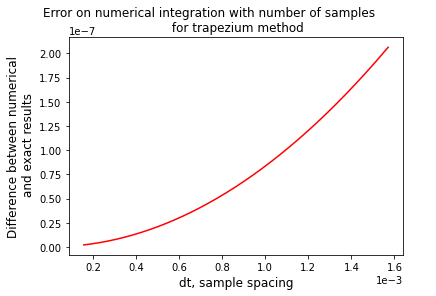

In [17]:
# Creates the figure
fig1, ax1 = plt.subplots()

# Plots the data
ax1.plot(dt, np.abs(difference), "r-")

# Sets the axes
ax1.set_xlabel('dt, sample spacing', fontsize=12)
ax1.set_ylabel('Difference between numerical\n and exact results', fontsize=12)

# Sets the title
ax1.set_title('Error on numerical integration with number of samples\
              \n for trapezium method', fontsize=12)

# Uses scientific notation for the x axis
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

We know that the error on a trapezium rule integration goes as the square of the sample spacing. We can check this by plotting the difference against dt$^2$. The output is a straight line so we can see that this is true.

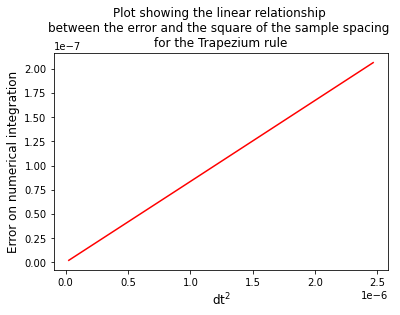

In [18]:
# Creates the figure
fig2, ax2 = plt.subplots()

# Plots the data
ax2.plot(dt**2, np.abs(difference), "r-")

# Sets the axes
ax2.set_xlabel('dt$^2$', fontsize=12)
ax2.set_ylabel('Error on numerical integration', fontsize=12)

# Sets the title
ax2.set_title('Plot showing the linear relationship \
\nbetween the error and the square of the sample spacing \
\nfor the Trapezium rule', fontsize=12)

# Uses scientific notation for the x axis
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))